In [26]:
#Importar bibliotecas que vamos utilizar
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans #Bibioteca para plotagem de graficos


In [5]:
#Ler o arquivo CSV
df = pd.read_csv('dadosacoes.csv')

In [6]:
#informações do dataframe
df.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [7]:
#Analise descritiva do dataframe
df.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


C:\Users\dsadm\AppData\Local\Temp\ipykernel_24540\3666595252.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x=df['nome ação'], y=df['preço ação R$'], boxprops=boxprops, palette="Set1")
C:\Users\dsadm\AppData\Local\Temp\ipykernel_24540\3666595252.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x=df['nome ação'], y=df['valor de mercado R$ -(Bilhões)'], boxprops=boxprops, palette="Set1")


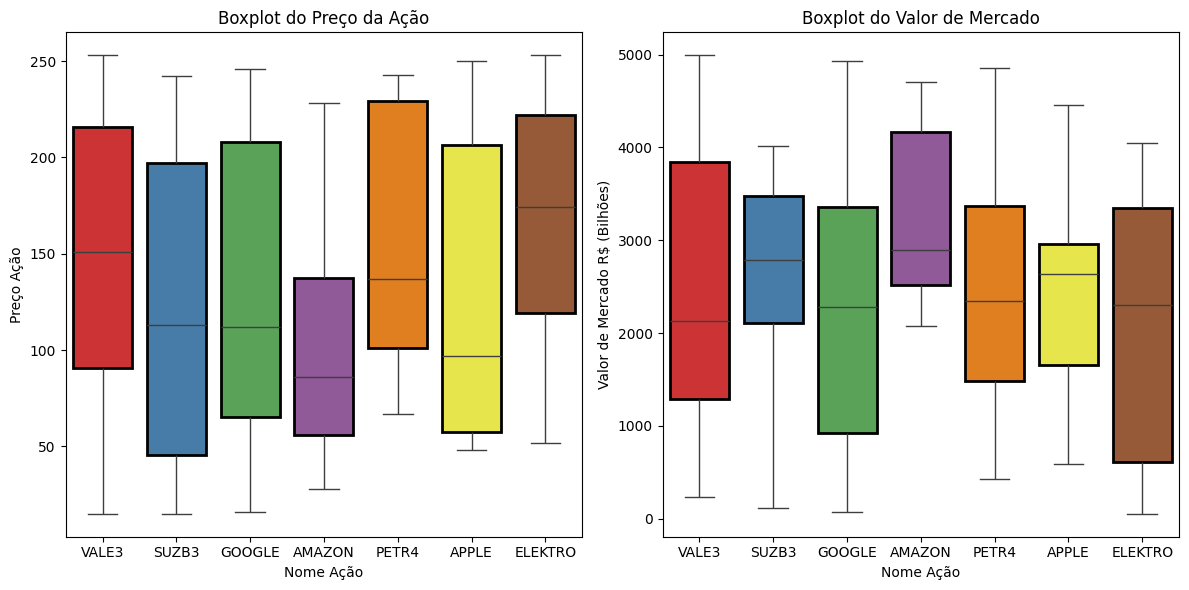

In [23]:
# Configuração padrão para a cor dos contornos dos boxes
boxprops = {'edgecolor': 'black', 'linewidth': 2}

# Configurar subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Boxplot 1
sns.boxplot(ax=axes[0], x=df['nome ação'], y=df['preço ação R$'], boxprops=boxprops, palette="Set1")
axes[0].set_title('Boxplot do Preço da Ação')
axes[0].set_ylabel('Preço Ação')
axes[0].set_xlabel('Nome Ação')

# Boxplot 2
sns.boxplot(ax=axes[1], x=df['nome ação'], y=df['valor de mercado R$ -(Bilhões)'], boxprops=boxprops, palette="Set1")
axes[1].set_title('Boxplot do Valor de Mercado')
axes[1].set_ylabel('Valor de Mercado R$ (Bilhões)')
axes[1].set_xlabel('Nome Ação')

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [25]:
#verifica se existe valor vazio
df.isnull().sum() 

nome ação                         0
preço ação R$                     0
qtde cotas                        0
valor de mercado R$ -(Bilhões)    0
dtype: int64

In [27]:
# transformação dos dados
dados_ativos = pd.get_dummies(df,columns=['nome ação']) # aplica o get dummies 
#para transformar variaveis categóricas em numericas

In [28]:
dados_ativos

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),nome ação_AMAZON,nome ação_APPLE,nome ação_ELEKTRO,nome ação_GOOGLE,nome ação_PETR4,nome ação_SUZB3,nome ação_VALE3
0,194,45,2134,False,False,False,False,False,False,True
1,91,71,3069,False,False,False,False,False,True,False
2,165,41,2815,False,False,False,False,False,True,False
3,56,34,3613,False,False,False,False,False,True,False
4,212,9,2975,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
95,208,78,3035,False,False,False,False,False,True,False
96,253,60,3263,False,False,False,False,False,False,True
97,99,35,980,False,False,False,True,False,False,False
98,82,43,1866,False,False,False,False,False,False,True


In [29]:
# aplicando algoritmo de aprendizdo não supervisionado
kmeans = KMeans(n_clusters=4) # aplicando kmeans com 4 clusters
kmeans.fit(dados_ativos) #aplica o algoritmo kmeans no conjunto de dados

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [30]:
# avaliar a métrica do kmeans
sse = kmeans.inertia_
print(sse)

12979887.706485366


In [31]:
# Visualizar os resultados do agrupamento
labels = kmeans.labels_ # Nomes dos itens do agrupamento
centroids = kmeans.cluster_centers_ # Valores do interior do agrupamento

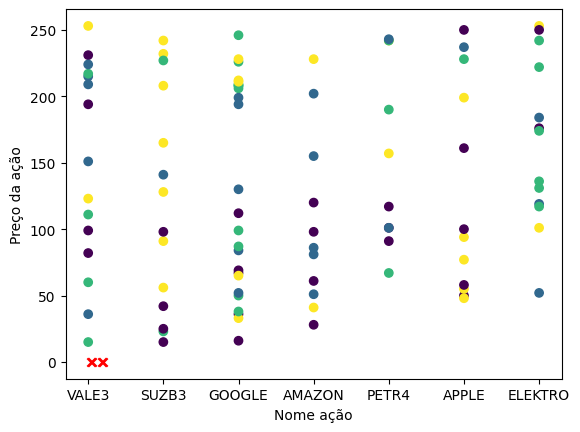

In [32]:
# Plotando o gráfico das visualizações

plt.scatter(df['nome ação'],df['preço ação R$'], c= labels) # plota  o gráfico com a visualização dos clusters
plt.scatter(centroids[:, 4], centroids[:, 4], marker='x', color='red') 
# : indica o começo  e 4 até qual linha vai
plt.xlabel("Nome ação")
plt.ylabel("Preço da ação")
plt.show()

In [33]:
dados_ativos['Grupo'] = labels # armazena os labels dos grupos restantes
grouped_data = dados_ativos.groupby('Grupo').mean() # agrupa os grupos com a media
print(grouped_data)

       preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Grupo                                                              
0         101.740741   54.777778                     2101.259259   
1         143.000000   49.772727                     4263.636364   
2         153.038462   50.307692                      553.961538   
3         149.680000   52.760000                     3137.320000   

       nome ação_AMAZON  nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Grupo                                                                           
0              0.148148         0.185185           0.074074          0.185185   
1              0.227273         0.045455           0.136364          0.227273   
2              0.000000         0.038462           0.230769          0.384615   
3              0.080000         0.200000           0.080000          0.200000   

       nome ação_PETR4  nome ação_SUZB3  nome ação_VALE3  
Grupo                                        

In [34]:
print(centroids) # printa o valor da distancia entre os pontos

[[1.01740741e+02 5.47777778e+01 2.10125926e+03 1.48148148e-01
  1.85185185e-01 7.40740741e-02 1.85185185e-01 1.11111111e-01
  1.48148148e-01 1.48148148e-01]
 [1.43000000e+02 4.97727273e+01 4.26363636e+03 2.27272727e-01
  4.54545455e-02 1.36363636e-01 2.27272727e-01 9.09090909e-02
  4.54545455e-02 2.27272727e-01]
 [1.53038462e+02 5.03076923e+01 5.53961538e+02 0.00000000e+00
  3.84615385e-02 2.30769231e-01 3.84615385e-01 1.15384615e-01
  7.69230769e-02 1.53846154e-01]
 [1.49680000e+02 5.27600000e+01 3.13732000e+03 8.00000000e-02
  2.00000000e-01 8.00000000e-02 2.00000000e-01 8.00000000e-02
  2.80000000e-01 8.00000000e-02]]


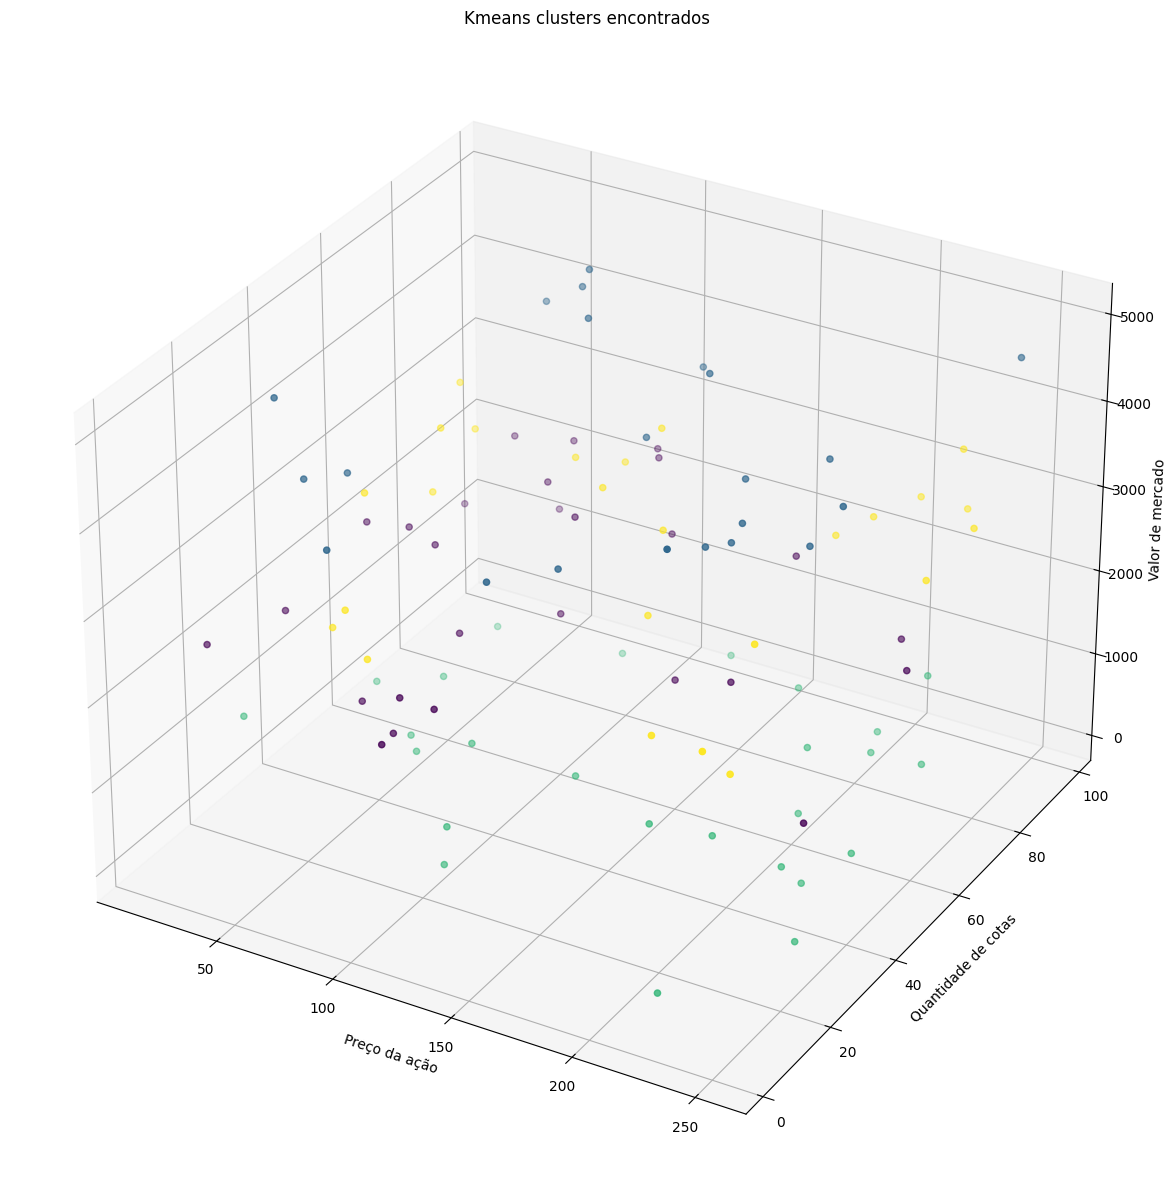

In [35]:
# Criando o gráfico em 3D
from mpl_toolkits.mplot3d import Axes3D
# Criando o gráfico em 3D
fig = plt.figure(figsize=(15,15)) # ajusta o tamanho da figura
ax = fig.add_subplot(111, projection='3d') # cria variável para armazenar a figura
ax.scatter(df['preço ação R$'], df['qtde cotas'], df['valor de mercado R$ -(Bilhões)'], c=labels)


ax.set_title('Kmeans clusters encontrados' )
ax.set_xlabel('Preço da ação')
ax.set_ylabel('Quantidade de cotas')
ax.set_zlabel('Valor de mercado')

plt.show()

In [36]:
# aplicando algoritmo de aprendizdo não supervisionado
kmeans = KMeans(n_clusters=5) # aplicando kmeans com 4 clusters
kmeans.fit(dados_ativos) #aplica o algoritmo kmeans no conjunto de dados

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [37]:
# avaliar a métrica do kmeans
sse = kmeans.inertia_
print(sse)

8707850.676868133


In [38]:
# Visualizar os resultados do agrupamento
labels = kmeans.labels_ # Nomes dos itens do agrupamento
centroids = kmeans.cluster_centers_ # Valores do interior do agrupamento

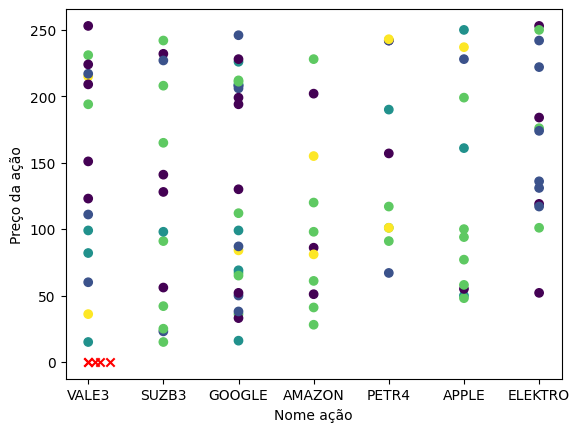

In [39]:
# Plotando o gráfico das visualizações

plt.scatter(df['nome ação'],df['preço ação R$'], c= labels) # plota  o gráfico com a visualização dos clusters
plt.scatter(centroids[:, 5], centroids[:, 5], marker='x', color='red') 
# : indica o começo  e 4 até qual linha vai
plt.xlabel("Nome ação")
plt.ylabel("Preço da ação")
plt.show()

In [40]:
dados_ativos['Grupo'] = labels # armazena os labels dos grupos restantes
grouped_data = dados_ativos.groupby('Grupo').mean() # agrupa os grupos com a media
print(grouped_data)

       preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Grupo                                                              
0         150.160000   48.840000                     3757.920000   
1         154.285714   52.952381                      432.285714   
2         120.307692   46.000000                     1409.461538   
3         118.303030   54.515152                     2544.333333   
4         144.000000   58.875000                     4757.250000   

       nome ação_AMAZON  nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Grupo                                                                           
0              0.120000         0.040000           0.160000          0.240000   
1              0.000000         0.047619           0.285714          0.333333   
2              0.000000         0.230769           0.000000          0.384615   
3              0.181818         0.181818           0.090909          0.181818   
4              0.250000         0.125

In [41]:
print(centroids) # printa o valor da distancia entre os pontos

[[ 1.50160000e+02  4.88400000e+01  3.75792000e+03  1.20000000e-01
   4.00000000e-02  1.60000000e-01  2.40000000e-01  8.00000000e-02
   1.60000000e-01  2.00000000e-01  1.88000000e+00]
 [ 1.54285714e+02  5.29523810e+01  4.32285714e+02 -1.38777878e-17
   4.76190476e-02  2.85714286e-01  3.33333333e-01  9.52380952e-02
   9.52380952e-02  1.42857143e-01  2.00000000e+00]
 [ 1.20307692e+02  4.60000000e+01  1.40946154e+03 -4.16333634e-17
   2.30769231e-01  2.77555756e-17  3.84615385e-01  7.69230769e-02
   7.69230769e-02  2.30769231e-01  7.69230769e-01]
 [ 1.18303030e+02  5.45151515e+01  2.54433333e+03  1.81818182e-01
   1.81818182e-01  9.09090909e-02  1.81818182e-01  9.09090909e-02
   2.12121212e-01  6.06060606e-02  1.27272727e+00]
 [ 1.44000000e+02  5.88750000e+01  4.75725000e+03  2.50000000e-01
   1.25000000e-01  0.00000000e+00  1.25000000e-01  2.50000000e-01
   0.00000000e+00  2.50000000e-01  1.00000000e+00]]


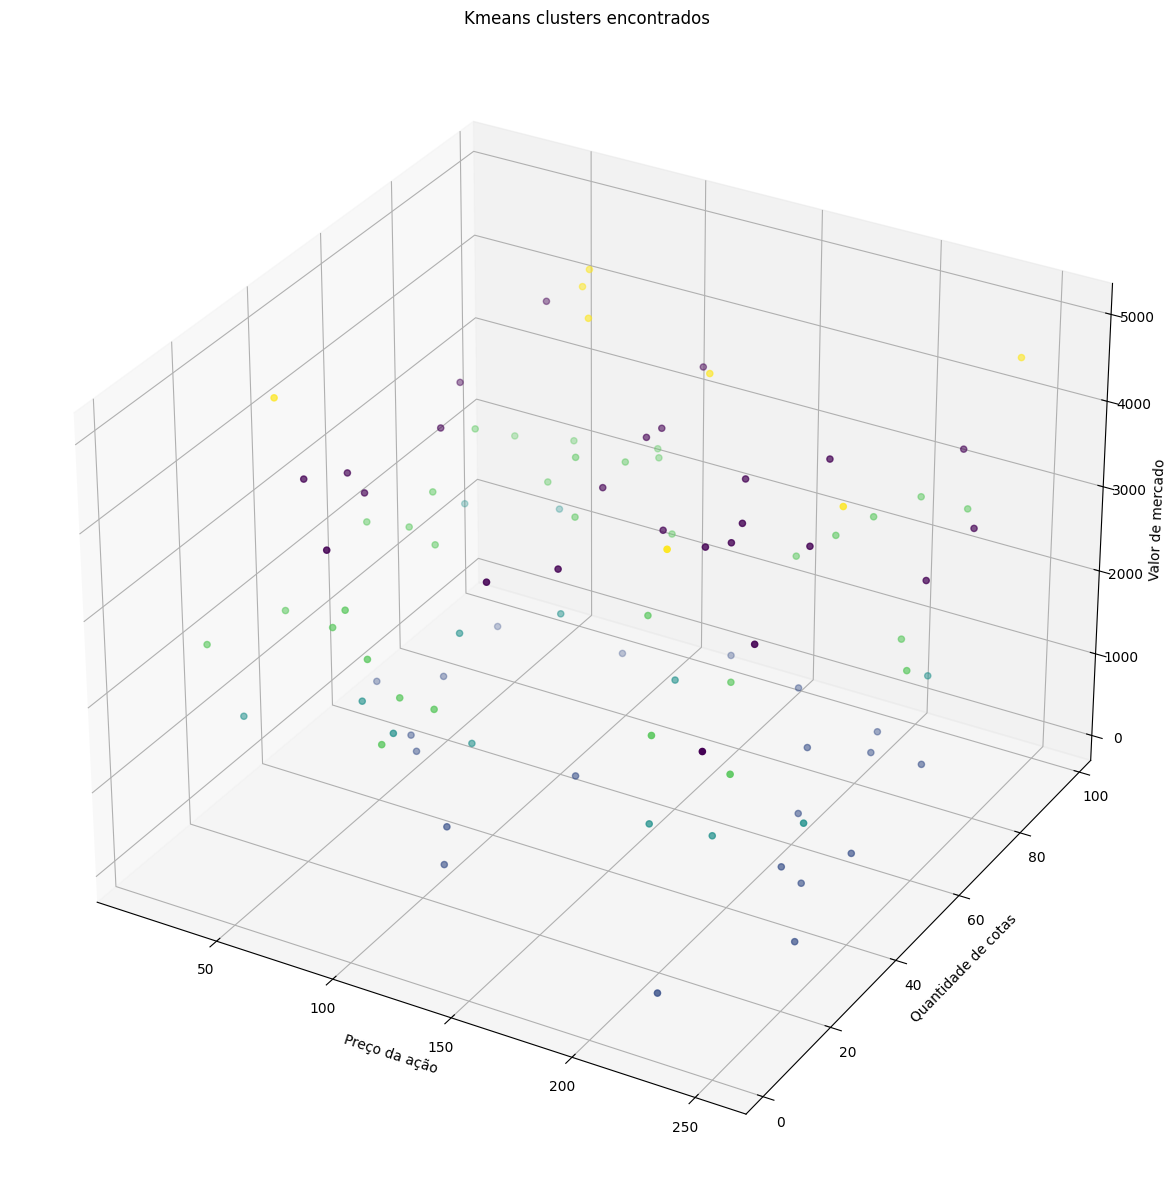

In [42]:
# Criando o gráfico em 3D
from mpl_toolkits.mplot3d import Axes3D
# Criando o gráfico em 3D
fig = plt.figure(figsize=(15,15)) # ajusta o tamanho da figura
ax = fig.add_subplot(111, projection='3d') # cria variável para armazenar a figura
ax.scatter(df['preço ação R$'], df['qtde cotas'], df['valor de mercado R$ -(Bilhões)'], c=labels)


ax.set_title('Kmeans clusters encontrados' )
ax.set_xlabel('Preço da ação')
ax.set_ylabel('Quantidade de cotas')
ax.set_zlabel('Valor de mercado')

plt.show()

In [44]:
# aplicando algoritmo de aprendizdo não supervisionado
kmeans = KMeans(n_clusters=8) # aplicando kmeans com 4 clusters
kmeans.fit(dados_ativos) #aplica o algoritmo kmeans no conjunto de dados

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [45]:
# avaliar a métrica do kmeans
sse = kmeans.inertia_
print(sse)

3006281.483584716


In [46]:
# Visualizar os resultados do agrupamento
labels = kmeans.labels_ # Nomes dos itens do agrupamento
centroids = kmeans.cluster_centers_ # Valores do interior do agrupamento

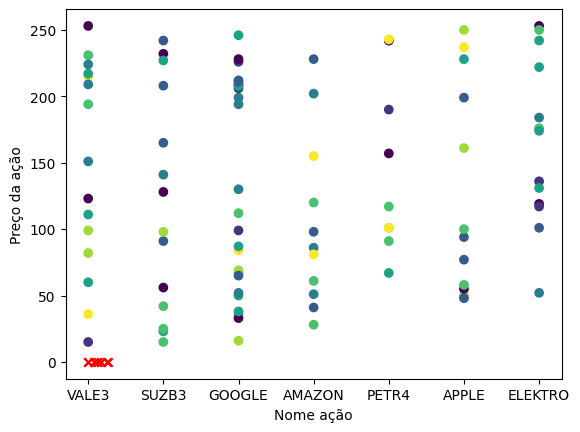

In [50]:
# Plotando o gráfico das visualizações

plt.scatter(df['nome ação'],df['preço ação R$'], c= labels) # plota  o gráfico com a visualização dos clusters
plt.scatter(centroids[:, 8], centroids[:, 8], marker='x', color='red') 
# : indica o começo  e 4 até qual linha vai
plt.xlabel("Nome ação")
plt.ylabel("Preço da ação")
plt.show()

In [51]:
dados_ativos['Grupo'] = labels # armazena os labels dos grupos restantes
grouped_data = dados_ativos.groupby('Grupo').mean() # agrupa os grupos com a media
print(grouped_data)

       preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Grupo                                                              
0         156.583333   57.250000                     3494.666667   
1         160.000000   42.333333                      944.444444   
2         138.666667   52.533333                     2853.866667   
3         144.230769   41.076923                     4000.923077   
4         149.352941   54.529412                      347.235294   
5         101.333333   56.166667                     2286.388889   
6         103.125000   50.250000                     1624.750000   
7         144.000000   58.875000                     4757.250000   

       nome ação_AMAZON  nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Grupo                                                                           
0              0.000000         0.083333           0.166667          0.166667   
1              0.000000         0.000000           0.222222          0.44444

In [52]:
print(centroids) # printa o valor da distancia entre os pontos

[[ 1.56583333e+02  5.72500000e+01  3.49466667e+03 -1.38777878e-17
   8.33333333e-02  1.66666667e-01  1.66666667e-01  1.66666667e-01
   2.50000000e-01  1.66666667e-01 -2.22044605e-16]
 [ 1.60000000e+02  4.23333333e+01  9.44444444e+02  1.38777878e-17
   0.00000000e+00  2.22222222e-01  4.44444444e-01  2.22222222e-01
   0.00000000e+00  1.11111111e-01  1.55555556e+00]
 [ 1.38666667e+02  5.25333333e+01  2.85386667e+03  2.00000000e-01
   2.66666667e-01  6.66666667e-02  2.00000000e-01 -1.38777878e-17
   2.66666667e-01  2.77555756e-17  3.00000000e+00]
 [ 1.44230769e+02  4.10769231e+01  4.00092308e+03  2.30769231e-01
  -5.55111512e-17  1.53846154e-01  3.07692308e-01  0.00000000e+00
   7.69230769e-02  2.30769231e-01 -4.44089210e-16]
 [ 1.49352941e+02  5.45294118e+01  3.47235294e+02 -4.16333634e-17
   5.88235294e-02  2.35294118e-01  3.52941176e-01  5.88235294e-02
   1.17647059e-01  1.76470588e-01  1.00000000e+00]
 [ 1.01333333e+02  5.61666667e+01  2.28638889e+03  1.66666667e-01
   1.11111111e-01  

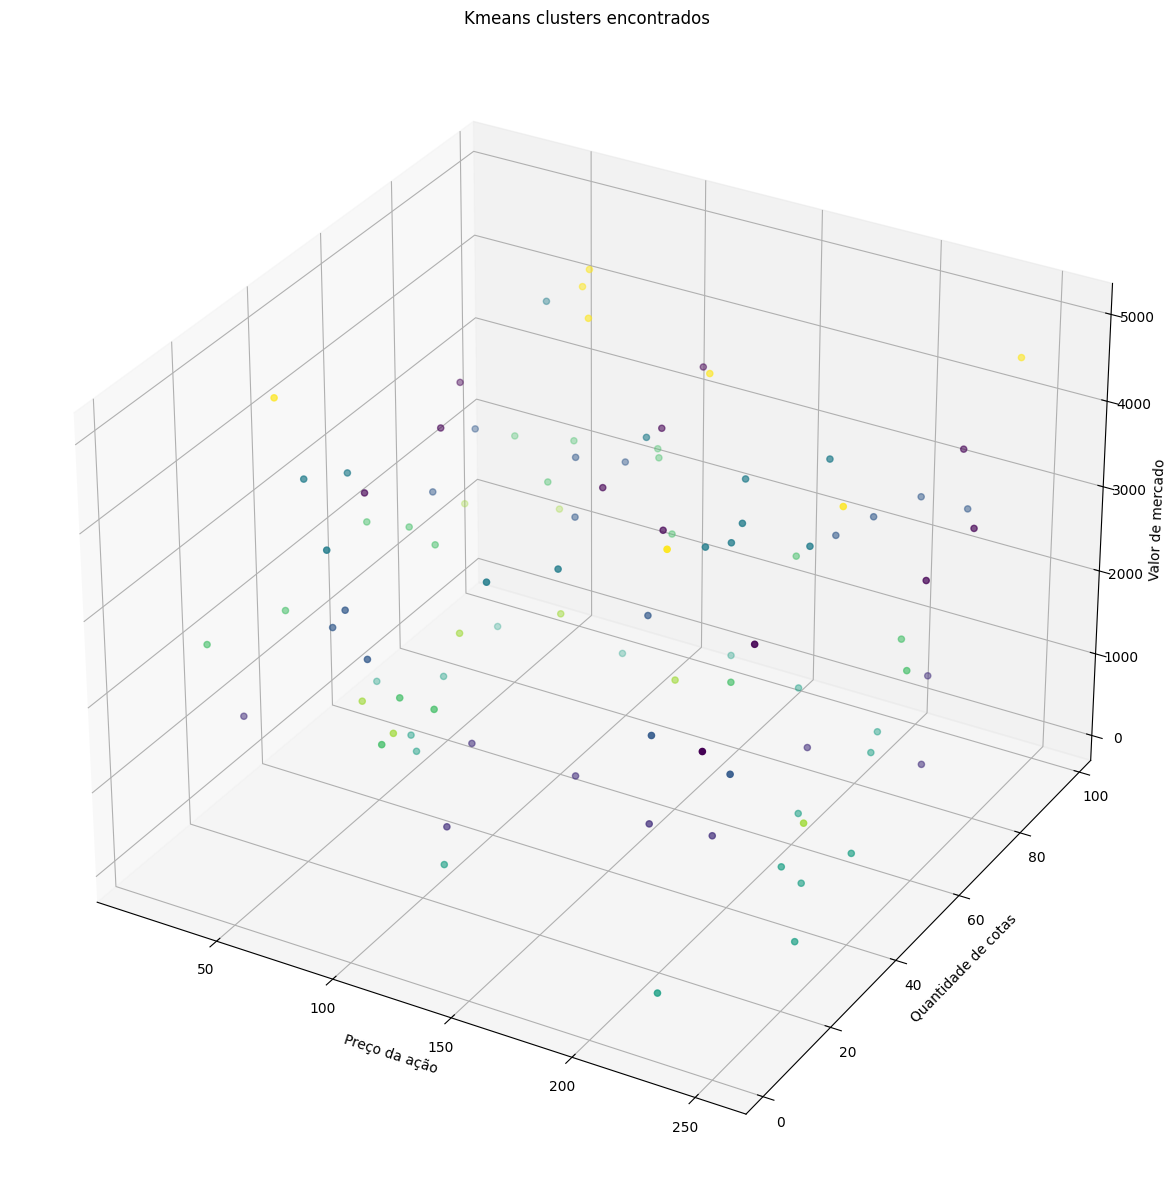

In [53]:
# Criando o gráfico em 3D
from mpl_toolkits.mplot3d import Axes3D
# Criando o gráfico em 3D
fig = plt.figure(figsize=(15,15)) # ajusta o tamanho da figura
ax = fig.add_subplot(111, projection='3d') # cria variável para armazenar a figura
ax.scatter(df['preço ação R$'], df['qtde cotas'], df['valor de mercado R$ -(Bilhões)'], c=labels)


ax.set_title('Kmeans clusters encontrados' )
ax.set_xlabel('Preço da ação')
ax.set_ylabel('Quantidade de cotas')
ax.set_zlabel('Valor de mercado')

plt.show()

In [ ]:
##O aprendizado não supervisionado se destaca por não exigir rótulos nos dados de treinamento, 
#simplificando o processo de treinamento ao explorar padrões sem a necessidade de respostas conhecidas. 
#Sua principal vantagem esta na capacidade de descobrir estruturas e relações nos dados, antecipadamente, 
#sendo útil para revelar padrões desconhecidos. Algoritmos não supervisionados, como clustering, 
#exploram a estrutura subjacente dos dados, sendo valiosos na identificação de grupos naturais ou na representação mais compacta dos dados,
#preparação para tarefas supervisionadas e descoberta de informações ocultas.